In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from autofeat import FeatureSelector, AutoFeatRegressor

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Feature Selection

In [2]:
# generate some toy data
np.random.seed(10)
x1 = np.random.rand(1000)
x2 = np.random.randn(1000)
x3 = np.random.rand(1000)
x4 = np.random.randn(1000)
x5 = np.random.rand(1000)
target = 2 + 15*x1 + 3/(x2 - 1/x3) + 5*(x2 + np.log(x1))**3
X = np.vstack([x1, x2, x3, x4, x5, 1/(x2 - 1/x3), (x2 + np.log(x1))**3]).T
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X, columns=["x1", "x2", "x3", "x4", "x5", "eng6", "eng7"]), target)
# should contain ["x1", "eng6", "eng7"]
print(new_X.columns)

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 3 features after 5 feature selection runs
[featsel] 3 features after correlation filtering
[featsel] 3 features after noise filtering
Index(['x1', 'eng7', 'eng6'], dtype='object')


## AutoFeat

In [3]:
# generate some toy data
np.random.seed(10)
x1 = np.random.rand(1000)
x2 = np.random.randn(1000)
x3 = np.random.rand(1000)
target = 2 + 15*x1 + 3/(x2 - 1/x3) + 5*(x2 + np.log(x1))**3
target_noisy = target + 0.01*target.std()*np.random.randn(1000)
target_very_noisy = target + 0.1*target.std()*np.random.randn(1000)
X = np.vstack([x1, x2, x3]).T
df_org = pd.DataFrame(X, columns=["x1", "x2", "x3"])

### Effect of number of feature engineering steps

### AutoFeat with 0 feateng_steps
[AutoFeat] The 0 step feature engineering process could generate up to 3 features.
[AutoFeat] With 1000 data points this new feature matrix would use about 0.00 gb of space.
[feateng] Warning: no features generated for max_steps < 1.
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 2 features after 5 feature selection runs
[featsel] 2 features after correlation filtering
[featsel] 2 features after noise filtering
[AutoFeat] Final dataframe with 3 feature columns (0 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
-144.52306261659768
214.075392 * x1
41.431441 * x2
[AutoFeat] Final score: 0.3310
## Final R^2: 0.3310
### AutoFeat with 1 feateng_steps
[AutoFeat] The 1 step feature engineering process could generate up to 21 features.
[Auto

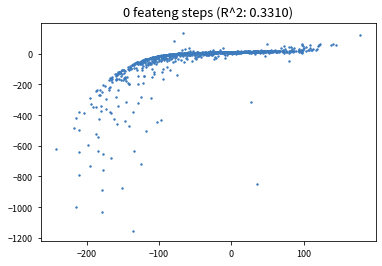

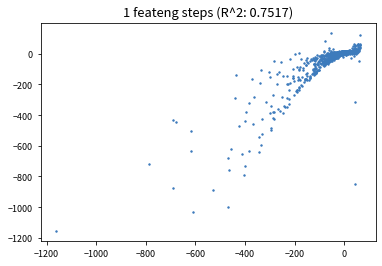

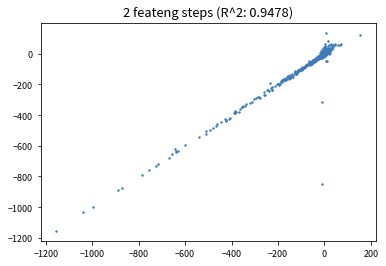

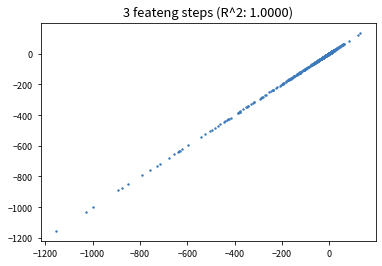

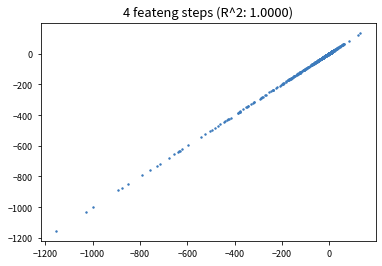

In [4]:
# autofeat with different number of feature engineering steps
# 3 are perfect
for steps in range(5):
    np.random.seed(55)
    print("### AutoFeat with %i feateng_steps" % steps)
    afreg = AutoFeatRegressor(verbose=1, feateng_steps=steps)
    df = afreg.fit_transform(df_org, target)
    r2 = afreg.score(df_org, target)
    print("## Final R^2: %.4f" % r2)
    plt.figure()
    plt.scatter(afreg.predict(df_org), target, s=2);
    plt.title("%i FE steps (R^2: %.4f; %i new features)" % (steps, r2, len(afreg.new_feat_cols_)))

### AutoFeat and noise

[AutoFeat] The 3 step feature engineering process could generate up to 5271 features.
[AutoFeat] With 1000 data points this new feature matrix would use about 0.02 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 17 transformed features from 3 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 748 feature combinations from 190 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 3421 transformed features from 748 original features - done.
[feateng] Generated altogether 4262 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 2913 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 15 featur

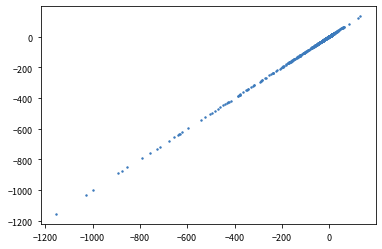

In [5]:
afreg = AutoFeatRegressor(verbose=1, feateng_steps=3)
# train on noisy data
df = afreg.fit_transform(df_org, target_noisy)
# test on real targets
print("Final R^2: %.4f" % afreg.score(df, target))
plt.figure()
plt.scatter(afreg.predict(df), target, s=2);

[AutoFeat] The 3 step feature engineering process could generate up to 5271 features.
[AutoFeat] With 1000 data points this new feature matrix would use about 0.02 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 17 transformed features from 3 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 748 feature combinations from 190 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 3421 transformed features from 748 original features - done.
[feateng] Generated altogether 4262 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 2913 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 24 featur

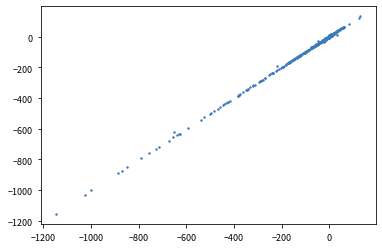

In [6]:
afreg = AutoFeatRegressor(verbose=1, feateng_steps=3)
# train on noisy data
df = afreg.fit_transform(df_org, target_very_noisy)
# test on real targets
print("Final R^2: %.4f" % afreg.score(df, target))
plt.figure()
plt.scatter(afreg.predict(df), target, s=2);